In [ ]:
"C:\Users\Hp\OneDrive\Desktop\ann_dataset\high"
"C:\Users\Hp\OneDrive\Desktop\ann_dataset\low"
"C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced"

In [90]:
import os
import cv2
import numpy as np
import pywt
from skimage import exposure
from IPython.display import display, Image

enter image number: 179


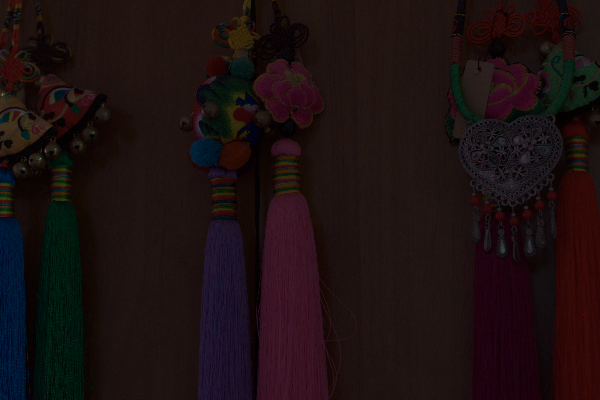

In [91]:
# show a low light image
picture_number=int(input("enter image number: "))
img_path = os.path.join(input_low_folder, f"{picture_number}.png")
display(Image(filename=img_path))


In [92]:
# Function to apply wavelet transform and enhance low-frequency bands
def enhance_image(img):
    # Decompose image using wavelet transform
    coeffs = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs

    # Enhance the low frequency component
    #increasing value of alpha, The enhanced low-frequency component becomes more prominent, making the image overall brighter
    #decreasing value of alpha, The effect of enhancement becomes milder, preserving more details in the original image.
    alpha = 1.5
    enhanced_LL = alpha * LL

    # Reconstruct the enhanced image
    coeffs_enhanced = enhanced_LL, (LH, HL, HH)
    enhanced_img = pywt.idwt2(coeffs_enhanced, 'haar')

    # Clip pixel values to ensure they are within valid range
    enhanced_img = np.clip(enhanced_img, 0, 255).astype(np.uint8)

    return enhanced_img

In [93]:
# Function to preprocess images
def preprocess_image(img):
    # Convert image to floating-point format
    img_float = img.astype(np.float32) / 255.0

    # Apply gamma correction to enhance brightness
    #if we increase gamma, image becomes darker by focusing on midtones and shadows, causing them to darken.
    #if we decrease gamma, image becomes brighter by focusing on highlights and midtones, causing them to brighten.
    gamma = 1.2
    gamma_corrected = np.uint8(((img_float) ** gamma) * 255)

    # Apply contrast stretching
    p2, p98 = np.percentile(gamma_corrected, (2, 98))
    contrast_stretched = exposure.rescale_intensity(gamma_corrected, in_range=(p2, p98))

    return contrast_stretched

In [2]:
# Function to enhance low-light images
def enhance_low_light_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get the list of low-light image files
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Iterate through low-light images and enhance them
    for filename in image_files:
        try:
            # Read the image with the flag cv2.IMREAD_COLOR to ensure it's loaded as RGB
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)

            if img is None:
                print(f"Error: Unable to read image '{filename}'. Skipping...")
                continue

            # Apply histogram equalization for initial enhancement
            '''1.Compute the histogram of the input image.
               2.Compute the cumulative distribution function (CDF) of the histogram.
               3.Normalize the CDF to span the full range of intensity values.
               4.Map each pixel intensity in the original image to its corresponding value in the normalized CDF.
               5.Replace each pixel intensity in the original image with its mapped value.
               Dark areas become darker, bright areas become brighter, and the overall distribution of intensities becomes more uniform.'''
            img_equalized = exposure.equalize_hist(img) * 255
            img_equalized = np.clip(img_equalized, 0, 255).astype(np.uint8)

            # Apply wavelet-based enhancement
            enhanced_img = enhance_image(img_equalized)

            # Save the enhanced image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, enhanced_img)

            print(f"Enhanced image saved: {output_path}")

        except Exception as e:
            print(f"Error processing image '{filename}': {e}")

In [95]:
# Paths to the input and output folders
input_low_folder = r"C:\Users\Hp\OneDrive\Desktop\ann_dataset\low"
output_folder = r"C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced"

In [96]:
# Enhance low-light images and store them in the output folder
enhance_low_light_images(input_low_folder, output_folder)

Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\1.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\10.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\100.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\101.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\102.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\103.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\104.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\105.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\106.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\107.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\109.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\110.png
Enhanced image saved: C:\Users\Hp\OneDrive\

Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\219.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\22.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\220.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\221.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\222.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\225.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\227.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\228.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\229.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\23.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\230.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\231.png
Enhanced image saved: C:\Users\Hp\OneDrive

Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\501.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\502.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\504.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\505.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\506.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\507.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\508.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\51.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\511.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\512.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\514.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\515.png
Enhanced image saved: C:\Users\Hp\OneDriv

Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\611.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\612.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\613.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\614.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\615.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\616.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\617.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\62.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\620.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\621.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\622.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\623.png
Enhanced image saved: C:\Users\Hp\OneDriv

Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\721.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\722.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\723.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\724.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\725.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\726.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\727.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\728.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\729.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\73.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\730.png
Enhanced image saved: C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced\731.png
Enhanced image saved: C:\Users\Hp\OneDriv

In [97]:
# Prompt user to input the picture number
picture_number = int(input("Enter the picture number: "))

Enter the picture number: 179


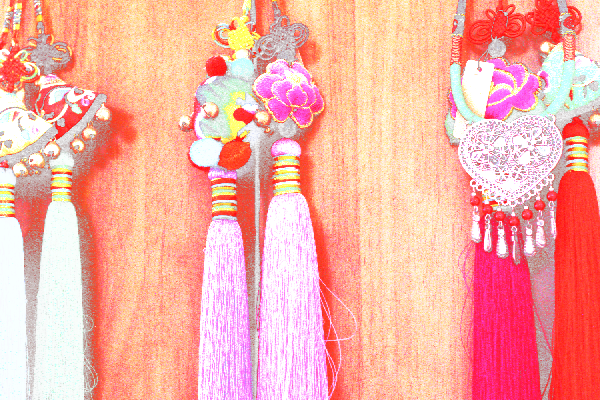

In [98]:
# show output image
input_low_folder = r"C:\Users\Hp\OneDrive\Desktop\ann_dataset\enhanced"

image_files = [f for f in os.listdir(input_low_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

if image_files:
    enhanced_img_path = os.path.join(output_folder, f"{picture_number}.png")
    display(Image(filename=enhanced_img_path))
else:
    print("No images found in the 'low' folder.")